In [6]:
import tensorflow.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior() 

In [7]:
tf.disable_v2_behavior() 


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from IPython.display import Image


# XOR with logistic regression - 예측 X

- XOR 문제 : 하나의 model (unit) 으로 풀 수 없는 문제점

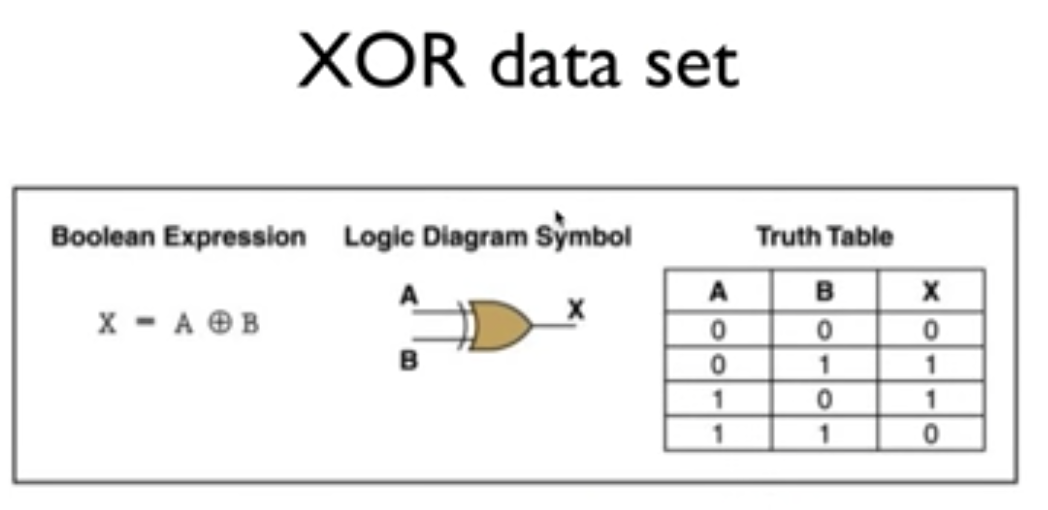

In [3]:
Image("img/TF_XOR.png") # code안에서 나오게 할 때

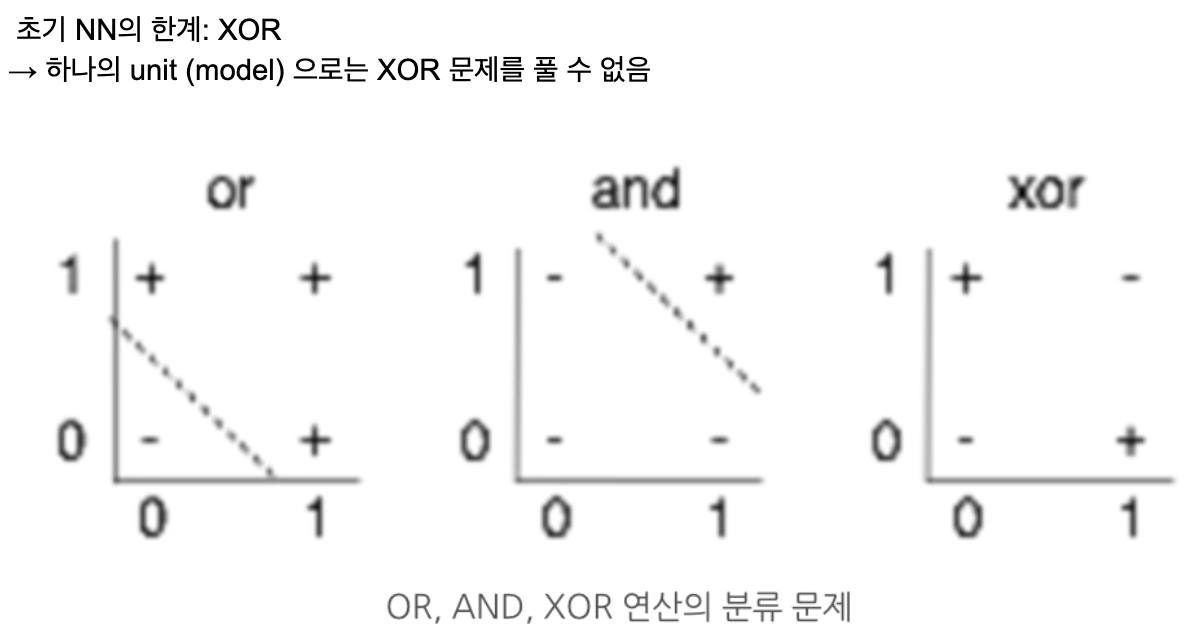

In [10]:
Image("img/TF_XOR_problem.png") # code안에서 나오게 할 때

In [9]:
tf.set_random_seed(777)  # for reproducibility


x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
#Bias 는 항상 out 의 수와 같음

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
### 복습 - Logistic regression 의 cost function
##### = -y * log (H(x)) - (1-y) * log (1-H(x))
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
### tf.cast 함수 : 부동소수점형에서 정수형으로 바꿈
### boolean 인 경우, True 이면 1, False 이면 0 
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val, w_val = sess.run(
                  [train, cost, W], feed_dict={X: x_data, Y: y_data}
        )
        
        if step % 100 == 0:
            print(step, cost_val, w_val)

    # Accuracy report
    h, c, a = sess.run(
              [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.83531475 [[ 2.1289144 ]
 [-0.06878974]]
100 0.7509972 [[1.3325253 ]
 [0.11121127]]
200 0.71649665 [[0.826962  ]
 [0.16584143]]
300 0.70278776 [[0.5151022 ]
 [0.16042353]]
400 0.697235 [[0.32364607]
 [0.1339101 ]]
500 0.69491947 [[0.20535943]
 [0.10395248]]
600 0.6939283 [[0.13155022]
 [0.07736824]]
700 0.6934955 [[0.08500133]
 [0.05605482]]
800 0.6933036 [[0.05534258]
 [0.03987858]]
900 0.6932179 [[0.03626803]
 [0.0280069 ]]
1000 0.6931792 [[0.02389885]
 [0.01948566]]
1100 0.69316167 [[0.01582046]
 [0.01346288]]
1200 0.6931538 [[0.01051238]
 [0.00925294]]
1300 0.69315016 [[0.00700686]
 [0.00633406]]
1400 0.6931485 [[0.00468203]
 [0.00432263]]
1500 0.69314784 [[0.00313494]
 [0.00294291]]
1600 0.69314754 [[0.00210245]
 [0.00199988]]
1700 0.69314736 [[0.00141186]
 [0.00135705]]
1800 0.69314724 [[0.00094911]
 [0.00091983]]
1900 0.69314724 [[0.0006385 ]
 [0.00062286]]
2000 0.6931472 [[0.00042994]
 [0.00042159]]
2100 0.6931472 [[0.0002896 ]
 [0.00028513]]
2200 0.6931472 [[0.00019514]
 [0

# Neural Network - XOR
--> 기존에 하나의 unit 으로 해결 불가능한 XOR 문제를 2개의 Layer 로 해결 가능

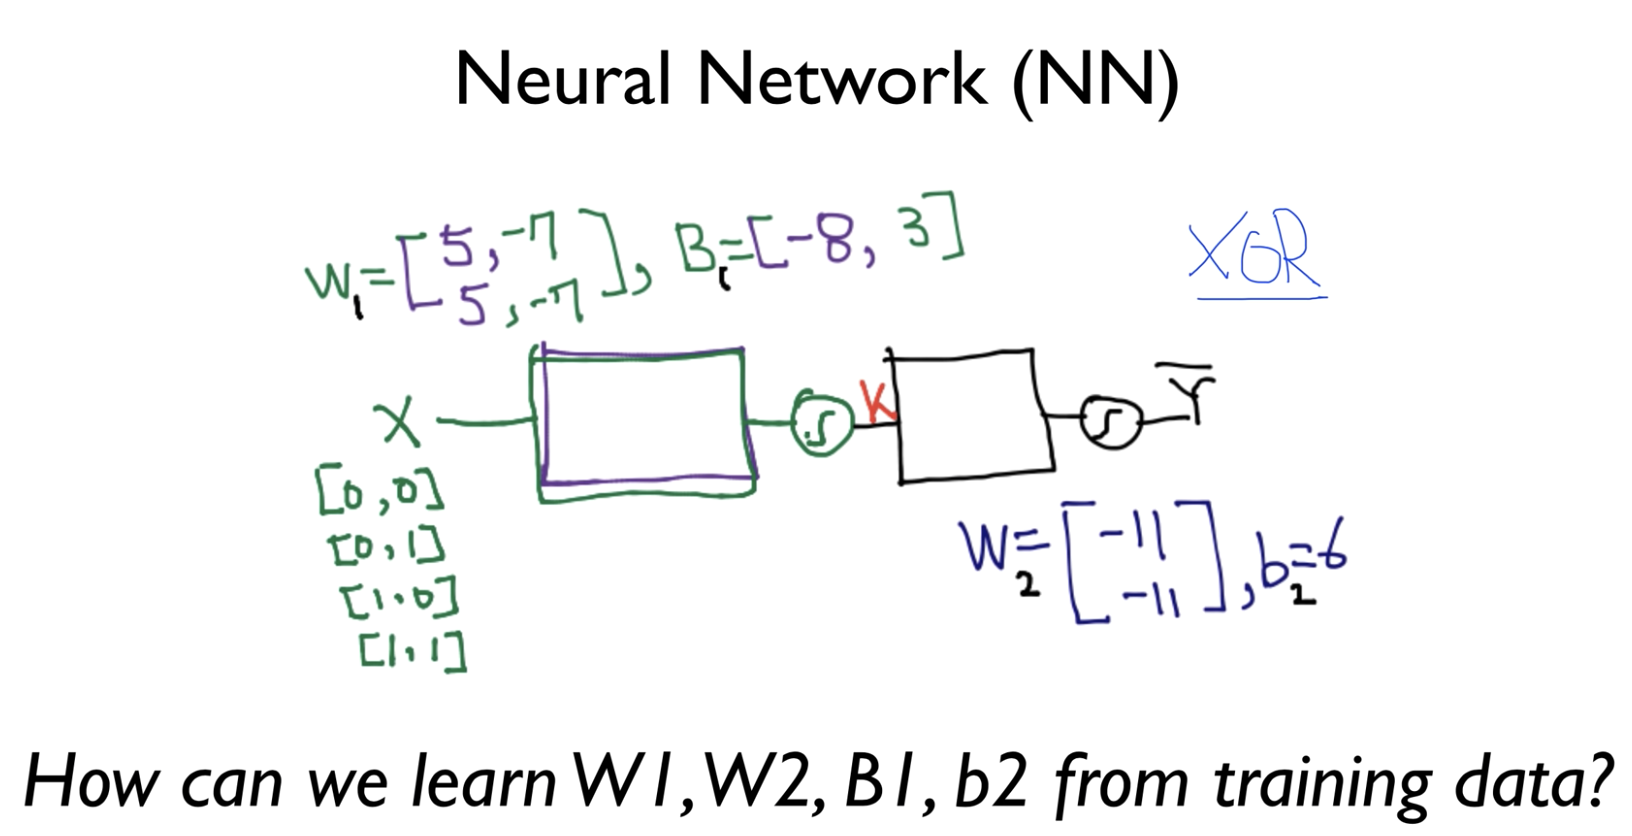

In [12]:
Image("img/TF-NN_2layer.png") # code안에서 나오게 할 때

In [15]:

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

#### 중요 : Weigh 의 Shape [입력, 출력]

#### Layer1
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1') 
#W1 [2,2] ==> x1, x2 가 입력으로 들어오기 때문에 shape[0] = 2
#W1 [2,2] ==> 중간단계에서의 출력은 2 ==> 즉, Layer1 의 output은 2개가 됨
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

#### Layer2 : Layer1 이 Input 으로 들어감
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
#W1 [2,2] ==> Layer1 의 output 2
#W1 [1] ==> output : 0,1 중 하나
b2 = tf.Variable(tf.random_normal([1]), name='bias2')

hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")


0 1.0657368
100 0.701875
200 0.6995342
300 0.6978459
400 0.6965358
500 0.6954594
600 0.69452316
700 0.6936608
800 0.6928204
900 0.69195604
1000 0.69102114
1100 0.68996376
1200 0.68872106
1300 0.6872146
1400 0.68534577
1500 0.6829924
1600 0.680007
1700 0.676222
1800 0.6714619
1900 0.66556644
2000 0.6584269
2100 0.6500246
2200 0.6404642
2300 0.6299809
2400 0.6189119
2500 0.6076376
2600 0.59651405
2700 0.58581924
2800 0.57572806
2900 0.5663124
3000 0.55755436
3100 0.54936177
3200 0.54157495
3300 0.5339556
3400 0.5261487
3500 0.51759994
3600 0.5074242
3700 0.49430335
3800 0.4767015
3900 0.45345894
4000 0.42398497
4100 0.38832605
4200 0.3479939
4300 0.30616015
4400 0.26635227
4500 0.23097423
4600 0.2008993
4700 0.17592263
4800 0.15535447
4900 0.13840339
5000 0.12435093
5100 0.112603605
5200 0.1026916
5300 0.094249226
5400 0.08699305
5500 0.080703266
5600 0.07520802
5700 0.07037207
5800 0.06608795
5900 0.062269576
6000 0.058847293
6100 0.05576439
6200 0.052974127
6300 0.050437894
6400 0.0481

# Wide & Deep NN for XOR

- LAYER 가 많을수록, 넓을수록 학습이 정확해짐
- Hypothesis 의 값이 크면 더 커지고, 작으면 더 작아짐을 확인 가능

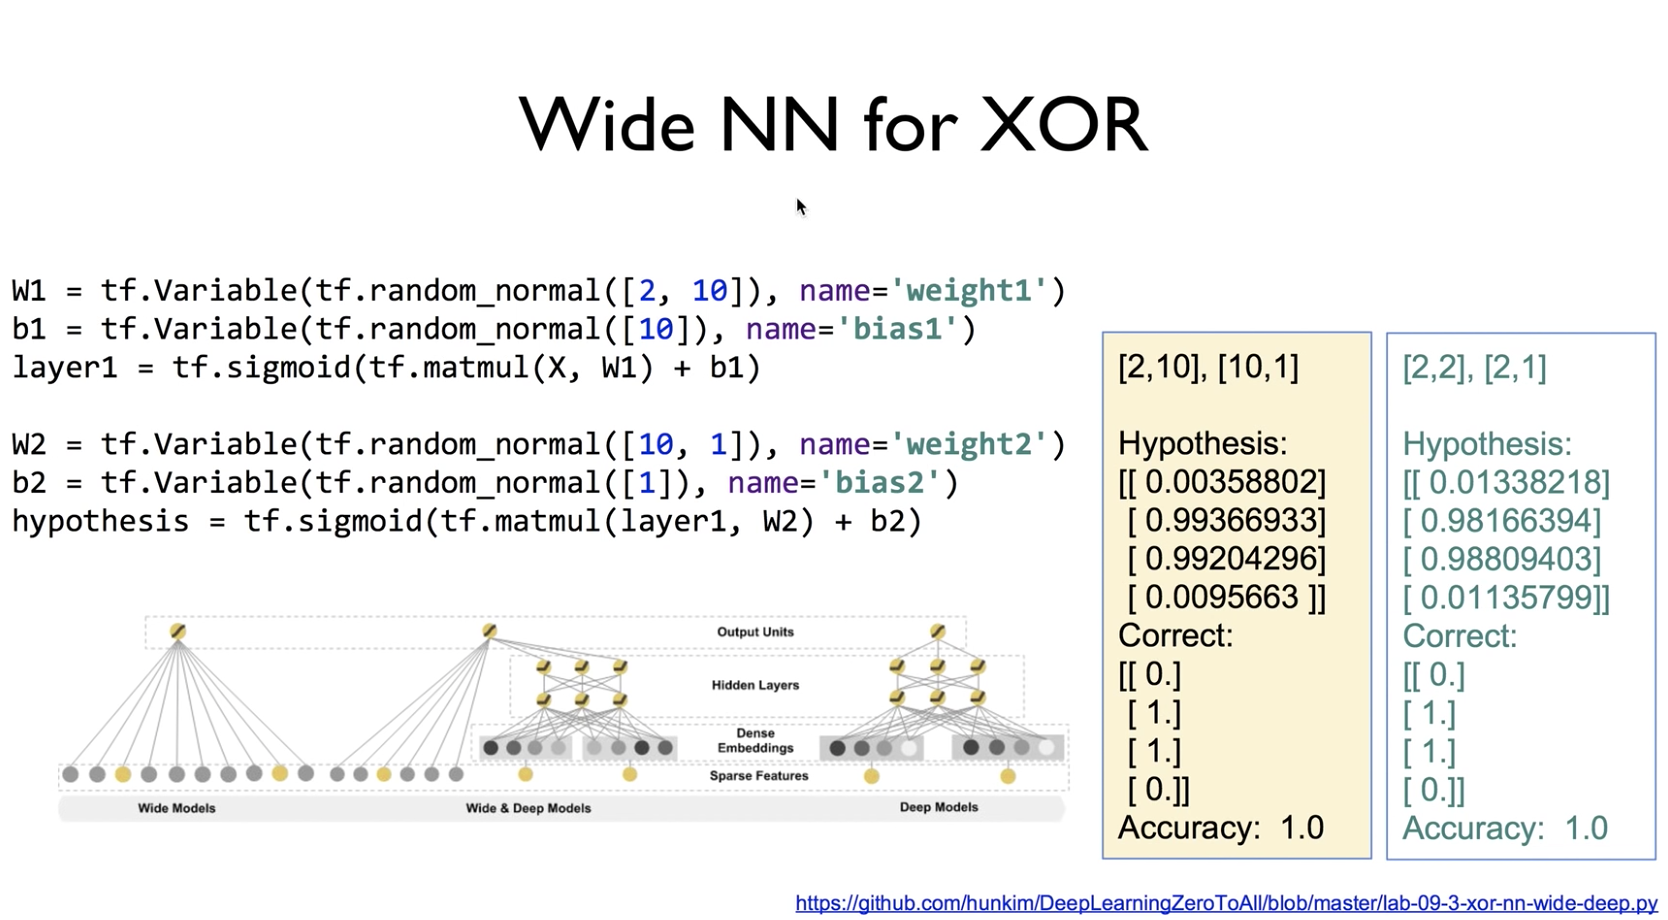

In [16]:
Image("img/TF_WideNN.png") # code안에서 나오게 할 때

In [18]:
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

### input 2 --> output 10
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 1.0804031
100 0.68993914
200 0.6820021
300 0.674358
400 0.66541904
500 0.6537057
600 0.63785416
700 0.61600757
800 0.5847653
900 0.5378749
1000 0.46490687
1100 0.35900086
1200 0.24318157
1300 0.1549068
1400 0.10140952
1500 0.07068239
1600 0.05235157
1700 0.040727086
1800 0.03291192
1900 0.027390622
2000 0.023327403
2100 0.020235501
2200 0.01781683
2300 0.015880797
2400 0.014300795
2500 0.012990087
2600 0.011887127
2700 0.010947676
2800 0.010138741
2900 0.0094356965
3000 0.008819466
3100 0.0082753915
3200 0.00779173
3300 0.0073591904
3400 0.0069702654
3500 0.006618783
3600 0.006299739
3700 0.006008891
3800 0.005742797
3900 0.005498396
4000 0.005273245
4100 0.0050651873
4200 0.004872403
4300 0.00469322
4400 0.004526374
4500 0.004370601
4600 0.004224834
4700 0.0040882304
4800 0.003959874
4900 0.0038391484
5000 0.0037253024
5100 0.0036178408
5200 0.0035162074
5300 0.0034200125
5400 0.003328746
5500 0.0032420922
5600 0.0031597211
5700 0.0030813632
5800 0.003006658
5900 0.0029353811
6000 0